# Survey Analysis
 

**Dataset Info:** Stack Overflow, a popular website for developers, conducted an online survey of software professionals across the world. The survey data was later open sourced by Stack Overflow. This randomised subset contains around 1/10th of the original data set.

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

**Load the data file**

In [2]:
df_base=pd.read_csv(r"C:\Users\neera\Desktop\m1_survey_data.csv")

In [3]:
df_base.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [4]:
pd.set_option('display.max_rows', 120)

In [5]:
# Checking the data types of all the columns
df_base.dtypes

Respondent                  int64
MainBranch                 object
Hobbyist                   object
OpenSourcer                object
OpenSource                 object
Employment                 object
Country                    object
Student                    object
EdLevel                    object
UndergradMajor             object
EduOther                   object
OrgSize                    object
DevType                    object
YearsCode                  object
Age1stCode                 object
YearsCodePro               object
CareerSat                  object
JobSat                     object
MgrIdiot                   object
MgrMoney                   object
MgrWant                    object
JobSeek                    object
LastHireDate               object
LastInt                    object
FizzBuzz                   object
JobFactors                 object
ResumeUpdate               object
CurrencySymbol             object
CurrencyDesc               object
CompTotal     

## Data Wrangling
 

### Finding duplicates

In [6]:
df=df_base
df[df['Respondent'].duplicated()]

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
1168,2339,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1169,2342,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,Some college/university study without earning ...,"Information systems, information technology, o...",...,Somewhat more welcome now than last year,Tech meetups or events in your area;Courses on...,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Too long,Easy
1170,2343,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Canada,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Indu...,27.0,Man,No,Straight / Heterosexual,Black or of African descent;White or of Europe...,No,Appropriate in length,Neither easy nor difficult
1171,2344,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1172,2347,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,NaN,Woman,No,Straight / Heterosexual,Biracial,No,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,4674,"I am not primarily a developer, but I write co...",Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Bangladesh,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,...,Somewhat less welcome now than last year,Tech articles written by other developers;Indu...,31.0,Man,No,Bisexual;Gay or Lesbian;Straight / Heterosexual,Black or of African descent;Hispanic or Latino...,Yes,Too long,Neither easy nor difficult
2298,4675,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",...,Just as welcome now as I felt last year,Tech meetups or events in your area,27.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
2299,4676,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Finland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Another engineering discipline (ex. civil, ele...",...,Somewhat less welcome now than last year,NaN,36.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
2300,4677,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United Kingdom,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",...,Just as welcome now as I felt last year,NaN,40.0,Man,No,Straight / Heterosexual,White or of European descent

We can see that there are total 154 duplicate rows.

### Removing duplicates

In [7]:
df.drop_duplicates(inplace=True)

Verifying if duplicates are successfully removed.

In [8]:
df[df['Respondent'].duplicated()]

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase


In [9]:
#Resetting the index
df.reset_index(drop=True, inplace=True) 

### Finding and removing missing values

In [10]:
#Finding missing values from all columns
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Respondent
False    11398
Name: Respondent, dtype: int64

MainBranch
False    11398
Name: MainBranch, dtype: int64

Hobbyist
False    11398
Name: Hobbyist, dtype: int64

OpenSourcer
False    11398
Name: OpenSourcer, dtype: int64

OpenSource
False    11317
True        81
Name: OpenSource, dtype: int64

Employment
False    11398
Name: Employment, dtype: int64

Country
False    11398
Name: Country, dtype: int64

Student
False    11347
True        51
Name: Student, dtype: int64

EdLevel
False    11286
True       112
Name: EdLevel, dtype: int64

UndergradMajor
False    10661
True       737
Name: UndergradMajor, dtype: int64

EduOther
False    11234
True       164
Name: EduOther, dtype: int64

OrgSize
False    11302
True        96
Name: OrgSize, dtype: int64

DevType
False    11333
True        65
Name: DevType, dtype: int64

YearsCode
False    11389
True         9
Name: YearsCode, dtype: int64

Age1stCode
False    11385
True        13
Name: Age1stCode, dtype: int64

YearsCodePro
False    113

* We can see that there are multiple columns with NaN values. We will treat each column separately.

In [11]:
freq=df['SurveyLength'].value_counts().max()
df['SurveyLength'].replace(np.nan, freq, inplace=True)
df['SurveyLength'].isnull().value_counts()

False    11398
Name: SurveyLength, dtype: int64

In [12]:
freq=df['SurveyEase'].value_counts().max()
df['SurveyEase'].replace(np.nan, freq, inplace=True)
df['SurveyEase'].isnull().value_counts()

False    11398
Name: SurveyEase, dtype: int64

In [13]:
freq=df['Dependents'].value_counts().max()
df['Dependents'].replace(np.nan, freq, inplace=True)
df['Dependents'].isnull().value_counts()

False    11398
Name: Dependents, dtype: int64

In [14]:
freq=df['Ethnicity'].value_counts().max()
df['Ethnicity'].replace(np.nan, freq, inplace=True)
df['Ethnicity'].isnull().value_counts()

False    11398
Name: Ethnicity, dtype: int64

In [15]:
freq=df['Sexuality'].value_counts().max()
df['Sexuality'].replace(np.nan, freq, inplace=True)
df['Sexuality'].isnull().value_counts()

False    11398
Name: Sexuality, dtype: int64

In [16]:
freq=df['Trans'].value_counts().max()
df['Trans'].replace(np.nan, freq, inplace=True)
df['Trans'].isnull().value_counts()

False    11398
Name: Trans, dtype: int64

In [17]:
freq=df['Gender'].value_counts().max()
df['Gender'].replace(np.nan, freq, inplace=True)
df['Gender'].isnull().value_counts()

False    11398
Name: Gender, dtype: int64

In [18]:
freq=df['Age'].mean()
df['Age'].replace(np.nan, freq, inplace=True)
df['Age'].isnull().value_counts()

False    11398
Name: Age, dtype: int64

In [19]:
freq=df['WelcomeChange'].value_counts().max()
df['WelcomeChange'].replace(np.nan, freq, inplace=True)
df['WelcomeChange'].isnull().value_counts()

False    11398
Name: WelcomeChange, dtype: int64

In [20]:
freq=df['SOJobs'].value_counts().max()
df['SOJobs'].replace(np.nan, freq, inplace=True)
df['SOJobs'].isnull().value_counts()

False    11398
Name: SOJobs, dtype: int64

In [21]:
freq=df['EntTeams'].value_counts().max()
df['EntTeams'].replace(np.nan, freq, inplace=True)
df['EntTeams'].isnull().value_counts()

False    11398
Name: EntTeams, dtype: int64

In [22]:
freq=df['SOAccount'].value_counts().max()
df['SOAccount'].replace(np.nan, freq, inplace=True)
df['SOAccount'].isnull().value_counts()

False    11398
Name: SOAccount, dtype: int64

In [23]:
freq=df['SOFindAnswer'].value_counts().max()
df['SOFindAnswer'].replace(np.nan, freq, inplace=True)
df['SOFindAnswer'].isnull().value_counts()

False    11398
Name: SOFindAnswer, dtype: int64

In [24]:
freq=df['SOTimeSaved'].value_counts().max()
df['SOTimeSaved'].replace(np.nan, freq, inplace=True)
df['SOTimeSaved'].isnull().value_counts()

False    11398
Name: SOTimeSaved, dtype: int64

In [25]:
freq=df['SOVisitTo'].value_counts().max()
df['SOVisitTo'].replace(np.nan, freq, inplace=True)
df['SOVisitTo'].isnull().value_counts()

False    11398
Name: SOVisitTo, dtype: int64

In [26]:
freq=df['SOVisitFreq'].value_counts().max()
df['SOVisitFreq'].replace(np.nan, freq, inplace=True)
df['SOVisitFreq'].isnull().value_counts()

False    11398
Name: SOVisitFreq, dtype: int64

In [27]:
freq=df['SOVisit1st'].value_counts().max()
df['SOVisit1st'].replace(np.nan, freq, inplace=True)
df['SOVisit1st'].isnull().value_counts()

False    11398
Name: SOVisit1st, dtype: int64

In [28]:
freq=df['ScreenName'].value_counts().max()
df['ScreenName'].replace(np.nan, freq, inplace=True)
df['ScreenName'].isnull().value_counts()

False    11398
Name: ScreenName, dtype: int64

In [29]:
freq=df['Extraversion'].value_counts().max()
df['Extraversion'].replace(np.nan, freq, inplace=True)
df['Extraversion'].isnull().value_counts()

False    11398
Name: Extraversion, dtype: int64

In [30]:
freq=df['SocialMedia'].value_counts().max()
df['SocialMedia'].replace(np.nan, freq, inplace=True)
df['SocialMedia'].isnull().value_counts()

False    11398
Name: SocialMedia, dtype: int64

In [31]:
freq=df['OffOn'].value_counts().max()
df['OffOn'].replace(np.nan, freq, inplace=True)
df['OffOn'].isnull().value_counts()

False    11398
Name: OffOn, dtype: int64

In [32]:
freq=df['ITperson'].value_counts().max()
df['ITperson'].replace(np.nan, freq, inplace=True)
df['ITperson'].isnull().value_counts()

False    11398
Name: ITperson, dtype: int64

In [33]:
freq=df['BetterLife'].value_counts().max()
df['BetterLife'].replace(np.nan, freq, inplace=True)
df['BetterLife'].isnull().value_counts()

False    11398
Name: BetterLife, dtype: int64

In [34]:
freq=df['Containers'].value_counts().max()
df['Containers'].replace(np.nan, freq, inplace=True)
df['Containers'].isnull().value_counts()

False    11398
Name: Containers, dtype: int64

In [35]:
freq=df['OpSys'].value_counts().max()
df['OpSys'].replace(np.nan, freq, inplace=True)
df['OpSys'].isnull().value_counts()

False    11398
Name: OpSys, dtype: int64

In [36]:
freq=df['DevEnviron'].value_counts().max()
df['DevEnviron'].replace(np.nan, freq, inplace=True)
df['DevEnviron'].isnull().value_counts()

False    11398
Name: DevEnviron, dtype: int64

In [37]:
freq=df['PlatformDesireNextYear'].value_counts().max()
df['PlatformDesireNextYear'].replace(np.nan, freq, inplace=True)
df['PlatformDesireNextYear'].isnull().value_counts()

False    11398
Name: PlatformDesireNextYear, dtype: int64

In [38]:
freq=df['PlatformWorkedWith'].value_counts().max()
df['PlatformWorkedWith'].replace(np.nan, freq, inplace=True)
df['PlatformWorkedWith'].isnull().value_counts()

False    11398
Name: PlatformWorkedWith, dtype: int64

In [39]:
freq=df['DatabaseWorkedWith'].value_counts().max()
df['DatabaseWorkedWith'].replace(np.nan, freq, inplace=True)
df['DatabaseWorkedWith'].isnull().value_counts()

False    11398
Name: DatabaseWorkedWith, dtype: int64

In [40]:
freq=df['LanguageDesireNextYear'].value_counts().max()
df['LanguageDesireNextYear'].replace(np.nan, freq, inplace=True)
df['LanguageDesireNextYear'].isnull().value_counts()

False    11398
Name: LanguageDesireNextYear, dtype: int64

In [41]:
freq=df['LanguageWorkedWith'].value_counts().max()
df['LanguageWorkedWith'].replace(np.nan, freq, inplace=True)
df['LanguageWorkedWith'].isnull().value_counts()

False    11398
Name: LanguageWorkedWith, dtype: int64

In [42]:
freq=df['PurchaseWhat'].value_counts().max()
df['PurchaseWhat'].replace(np.nan, freq, inplace=True)
df['PurchaseWhat'].isnull().value_counts()

False    11398
Name: PurchaseWhat, dtype: int64

In [43]:
freq=df['PurchaseHow'].value_counts().max()
df['PurchaseHow'].replace(np.nan, freq, inplace=True)
df['PurchaseHow'].isnull().value_counts()

False    11398
Name: PurchaseHow, dtype: int64

In [44]:
freq=df['UnitTests'].value_counts().max()
df['UnitTests'].replace(np.nan, freq, inplace=True)
df['UnitTests'].isnull().value_counts()

False    11398
Name: UnitTests, dtype: int64

In [45]:
freq=df['CodeRev'].value_counts().max()
df['CodeRev'].replace(np.nan, freq, inplace=True)
df['CodeRev'].isnull().value_counts()

False    11398
Name: CodeRev, dtype: int64

In [46]:
freq=df['ImpSyn'].value_counts().max()
df['ImpSyn'].replace(np.nan, freq, inplace=True)
df['ImpSyn'].isnull().value_counts()

False    11398
Name: ImpSyn, dtype: int64

In [47]:
freq=df['WorkLoc'].value_counts().max()
df['WorkLoc'].replace(np.nan, freq, inplace=True)
df['WorkLoc'].isnull().value_counts()

False    11398
Name: WorkLoc, dtype: int64

In [48]:
freq=df['WorkRemote'].value_counts().max()
df['WorkRemote'].replace(np.nan, freq, inplace=True)
df['WorkRemote'].isnull().value_counts()

False    11398
Name: WorkRemote, dtype: int64

In [49]:
freq=df['WorkChallenge'].value_counts().max()
df['WorkChallenge'].replace(np.nan, freq, inplace=True)
df['WorkChallenge'].isnull().value_counts()

False    11398
Name: WorkChallenge, dtype: int64

In [50]:
freq=df['WorkPlan'].value_counts().max()
df['WorkPlan'].replace(np.nan, freq, inplace=True)
df['WorkPlan'].isnull().value_counts()

False    11398
Name: WorkPlan, dtype: int64

In [51]:
freq=df['WorkWeekHrs'].value_counts().max()
df['WorkWeekHrs'].replace(np.nan, freq, inplace=True)
df['WorkWeekHrs'].isnull().value_counts()

False    11398
Name: WorkWeekHrs, dtype: int64

In [52]:
freq=df['ResumeUpdate'].value_counts().max()
df['ResumeUpdate'].replace(np.nan, freq, inplace=True)
df['ResumeUpdate'].isnull().value_counts()

False    11398
Name: ResumeUpdate, dtype: int64

In [53]:
freq=df['JobFactors'].value_counts().max()
df['JobFactors'].replace(np.nan, freq, inplace=True)
df['JobFactors'].isnull().value_counts()

False    11398
Name: JobFactors, dtype: int64

In [54]:
freq=df['FizzBuzz'].value_counts().max()
df['FizzBuzz'].replace(np.nan, freq, inplace=True)
df['FizzBuzz'].isnull().value_counts()

False    11398
Name: FizzBuzz, dtype: int64

In [55]:
freq=df['LastInt'].value_counts().max()
df['LastInt'].replace(np.nan, freq, inplace=True)
df['LastInt'].isnull().value_counts()

False    11398
Name: LastInt, dtype: int64

In [56]:
freq=df['MgrWant'].value_counts().max()
df['MgrWant'].replace(np.nan, freq, inplace=True)
df['MgrWant'].isnull().value_counts()

False    11398
Name: MgrWant, dtype: int64

In [57]:
freq=df['MgrMoney'].value_counts().max()
df['MgrMoney'].replace(np.nan, freq, inplace=True)
df['MgrMoney'].isnull().value_counts()

False    11398
Name: MgrMoney, dtype: int64

In [58]:
freq=df['MgrIdiot'].value_counts().max()
df['MgrIdiot'].replace(np.nan, freq, inplace=True)
df['MgrIdiot'].isnull().value_counts()

False    11398
Name: MgrIdiot, dtype: int64

In [59]:
freq=df['JobSat'].value_counts().max()
df['JobSat'].replace(np.nan, freq, inplace=True)
df['JobSat'].isnull().value_counts()

False    11398
Name: JobSat, dtype: int64

In [60]:
freq=df['JobSat'].value_counts().max()
df['JobSat'].replace(np.nan, freq, inplace=True)
df['JobSat'].isnull().value_counts()

False    11398
Name: JobSat, dtype: int64

In [61]:
freq=df['YearsCodePro'].value_counts().max()
df['YearsCodePro'].replace(np.nan, freq, inplace=True)
df['YearsCodePro'].isnull().value_counts()

False    11398
Name: YearsCodePro, dtype: int64

In [62]:
freq=df['Age1stCode'].value_counts().max()
df['Age1stCode'].replace(np.nan, freq, inplace=True)
df['Age1stCode'].isnull().value_counts()

False    11398
Name: Age1stCode, dtype: int64

In [63]:
freq=df['YearsCode'].value_counts().max()
df['YearsCode'].replace(np.nan, freq, inplace=True)
df['YearsCode'].isnull().value_counts()

False    11398
Name: YearsCode, dtype: int64

In [64]:
freq=df['DevType'].value_counts().max()
df['DevType'].replace(np.nan, freq, inplace=True)
df['DevType'].isnull().value_counts()

False    11398
Name: DevType, dtype: int64

In [65]:
freq=df['EduOther'].value_counts().max()
df['EduOther'].replace(np.nan, freq, inplace=True)
df['EduOther'].isnull().value_counts()

False    11398
Name: EduOther, dtype: int64

In [66]:
freq=df['OrgSize'].value_counts().max()
df['OrgSize'].replace(np.nan, freq, inplace=True)
df['OrgSize'].isnull().value_counts()

False    11398
Name: OrgSize, dtype: int64

In [67]:
freq=df['OpenSource'].value_counts().max()
df['OpenSource'].replace(np.nan, freq, inplace=True)
df['OpenSourcer'].isnull().value_counts()

False    11398
Name: OpenSourcer, dtype: int64

In [68]:
freq=df['Student'].value_counts().max()
df['Student'].replace(np.nan, freq, inplace=True)
df['Student'].isnull().value_counts()

False    11398
Name: Student, dtype: int64

In [69]:
freq=df['EdLevel'].value_counts().max()
df['EdLevel'].replace(np.nan, freq, inplace=True)
df['EdLevel'].isnull().value_counts()

False    11398
Name: EdLevel, dtype: int64

In [70]:
freq=df['UndergradMajor'].value_counts().max()
df['UndergradMajor'].replace(np.nan, freq, inplace=True)
df['UndergradMajor'].isnull().value_counts()

False    11398
Name: UndergradMajor, dtype: int64

In [71]:
df.drop(['CodeRevHrs', 'MiscTechWorkedWith', 'MiscTechDesireNextYear','BlockchainOrg','BlockchainIs','SOHowMuchTime','SONewContent'], axis=1, inplace=True)

In [72]:
df['DatabaseDesireNextYear'].fillna(method="ffill",inplace=True)
df['DatabaseDesireNextYear'].isnull().value_counts()

False    11398
Name: DatabaseDesireNextYear, dtype: int64

In [73]:
df['WebFrameDesireNextYear'].fillna(method="ffill",inplace=True)

In [74]:
df['WebFrameWorkedWith'].fillna(method="ffill",inplace=True)

In [75]:
df['SOPartFreq'].fillna(method="ffill",inplace=True)

In [76]:
df.dropna(subset=["ConvertedComp"], axis=0,inplace=True)
df['ConvertedComp'].isnull().value_counts()

False    10582
Name: ConvertedComp, dtype: int64

In [77]:
df.reset_index(drop=True, inplace=True)

**Verifying if any missing values are still there.**

In [78]:

missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Respondent
False    10582
Name: Respondent, dtype: int64

MainBranch
False    10582
Name: MainBranch, dtype: int64

Hobbyist
False    10582
Name: Hobbyist, dtype: int64

OpenSourcer
False    10582
Name: OpenSourcer, dtype: int64

OpenSource
False    10582
Name: OpenSource, dtype: int64

Employment
False    10582
Name: Employment, dtype: int64

Country
False    10582
Name: Country, dtype: int64

Student
False    10582
Name: Student, dtype: int64

EdLevel
False    10582
Name: EdLevel, dtype: int64

UndergradMajor
False    10582
Name: UndergradMajor, dtype: int64

EduOther
False    10582
Name: EduOther, dtype: int64

OrgSize
False    10582
Name: OrgSize, dtype: int64

DevType
False    10582
Name: DevType, dtype: int64

YearsCode
False    10582
Name: YearsCode, dtype: int64

Age1stCode
False    10582
Name: Age1stCode, dtype: int64

YearsCodePro
False    10582
Name: YearsCodePro, dtype: int64

CareerSat
False    10582
Name: CareerSat, dtype: int64

JobSat
False    10582
Name: JobSat, dtype:

**No missing values are found.**

In [79]:
df1=df

## Normalisation

There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq".

This makes it difficult to compare the total compensation of the developers.

In this section you will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

Once this column is ready, it makes comparison of salaries easy.

In [80]:
df1.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SOComm,WelcomeChange,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,"No, not really",Just as welcome now as I felt last year,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,"Yes, somewhat",Just as welcome now as I felt last year,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Neutral,Somewhat more welcome now than last year,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",6953,...,"Yes, somewhat",Just as welcome now as I felt last year,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,"Yes, somewhat",Just as welcome now as I felt last year,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [81]:
df1.loc[df['CompFreq'] == 'Monthly', 'NormalizedAnnualCompensation'] = df1['CompTotal']*12
df1.loc[df['CompFreq'] == 'Weekly', 'NormalizedAnnualCompensation'] = df1['CompTotal']*52
df1.loc[df['CompFreq'] == 'Yearly', 'NormalizedAnnualCompensation'] = df1['CompTotal']*1

In [82]:
#Verifying if conversion happened correctly
df1[['NormalizedAnnualCompensation','CompTotal']].head(30)

,NormalizedAnnualCompensation,CompTotal
0,61000.0,61000.0
1,138000.0,138000.0
2,90000.0,90000.0
3,348000.0,29000.0
4,90000.0,90000.0
5,114000.0,9500.0
6,36000.0,3000.0
7,103000.0,103000.0
8,69000.0,69000.0
9,96000.0,8000.0


* Dropping **CompFreq** and **CompTotal** columns

In [83]:
df1.drop(['CompFreq', 'CompTotal'], axis=1, inplace=True)

## Determining how data is distributed

Plotting distibition curve for ConvertedComp

<Axes: ylabel='Density'>

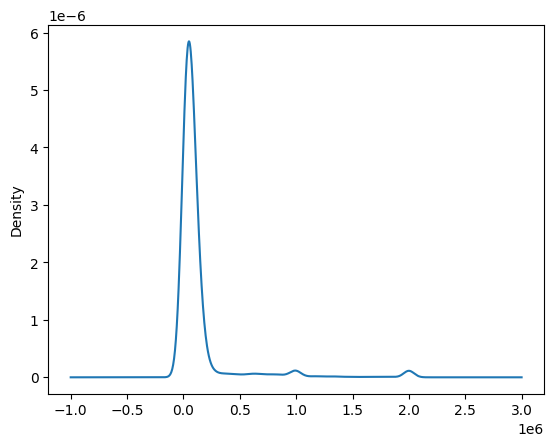

In [84]:
df1['ConvertedComp'].plot(kind='kde')

<Axes: ylabel='Frequency'>

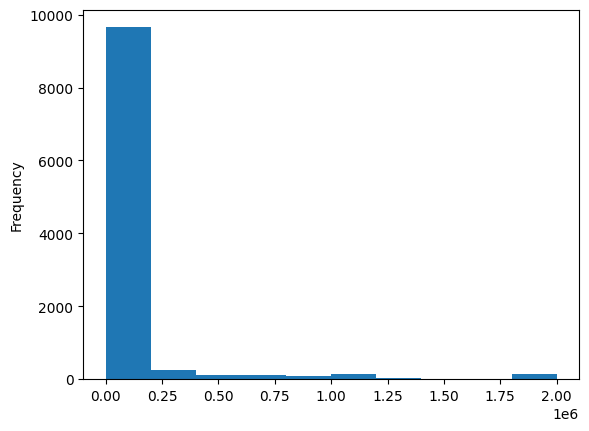

In [85]:
df1['ConvertedComp'].plot(kind='hist')

In [86]:
df1['ConvertedComp'].median()

57745.0

In [87]:
df2=df1[(df1['Gender'] == 'Man')]
df2['ConvertedComp'].median()

57744.0

In [88]:
df2=df1[(df1['Gender'] == 'Woman')]
df2['ConvertedComp'].median()

57708.0

**Insights:** 

Median annual compensation for man and woman combined is **$57745.0**


Median annual compensation for **man** is **$57744.0**


Median annual compensation for **woman** is **$57708.0**

* Five number summary for column age

In [89]:
df1['Age'].describe().to_frame()

,Age
count,10582.000000
mean,30.831874
std,7.309934
min,16.000000
25%,26.000000
50%,29.000000
75%,34.000000
max,99.000000


* Mean age is  **30.83 years**.
* 75% of the respondents are below 34 years of age.

## Finding Outliers

Finding if outliers exist in ConvertedComp

<Axes: ylabel='ConvertedComp'>

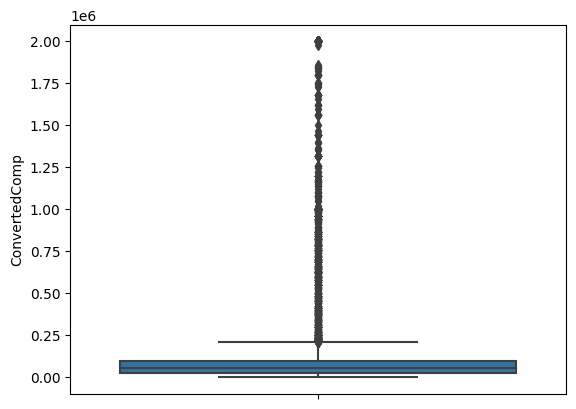

In [90]:
sns.boxplot(y="ConvertedComp", data=df)


In [91]:
a=df1['ConvertedComp'].quantile(0.25)
b=df1['ConvertedComp'].quantile(0.75)
iqr=b-a
upper_limit = b + 1.5 * iqr
lower_limit = a - 1.5 * iqr
new_df = df1[df1['ConvertedComp'] < upper_limit]
new_df1 = new_df[new_df['ConvertedComp'] > lower_limit]


In [92]:
#Calculating number of outliers

a1=df1[df1['ConvertedComp'] > upper_limit]
len(a1)

879

In [93]:
a2=df1[df1['ConvertedComp'] < lower_limit]
len(a2)

0

In [94]:
len(a1+a2)

879

In [95]:
new_df.shape

(9703, 77)

In [96]:
new_df['ConvertedComp'].median()

52704.0

In [97]:
new_df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,NormalizedAnnualCompensation
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,61000.0
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,138000.0
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy,90000.0
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy,90000.0
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy,114000.0


## Finding correlation

In [98]:
new_df.corr()

C:\Users\neera\AppData\Local\Temp\ipykernel_6084\4065070317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr()


,Respondent,ConvertedComp,WorkWeekHrs,Age,NormalizedAnnualCompensation
Respondent,1.000000,0.010878,-0.010301,0.002130,0.001313
ConvertedComp,0.010878,1.000000,-0.030406,0.396936,-0.086286
WorkWeekHrs,-0.010301,-0.030406,1.000000,-0.000424,0.005601
Age,0.002130,0.396936,-0.000424,1.000000,-0.016280
NormalizedAnnualCompensation,0.001313,-0.086286,0.005601,-0.016280,1.000000


**Insight:** We can see that compensation increases with age.

In [99]:
new_df.to_csv(r"C:\Users\neera\Desktop\StackoverflowEDA.csv", index=False)